In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

In [3]:
pd.set_option('display.max_columns', 30)
df.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,NaN,3.0,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [4]:
df.drop(['Unnamed: 0','team_name','team_id'],axis=1,inplace=True)

In [5]:
df.isna().sum()

match_event_id            1563
location_x                1461
location_y                1540
remaining_min             1562
power_of_shot             1486
knockout_match            1517
game_season               5862
remaining_sec             1594
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
date_of_game              1550
home/away                 1497
shot_id_number            1563
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot    15417
match_id                     0
remaining_min.1           1535
power_of_shot.1           1539
knockout_match.1          1493
remaining_sec.1           1539
distance_of_shot.1        1568
dtype: int64

# Processing Home/Away

In [6]:
for d in df['date_of_game'].dropna().unique():
    value = df[df['date_of_game'] == d]['home/away'].dropna().unique()[0]
    df['home/away'] = np.where(df['date_of_game'] == d, value, df['home/away'])

In [7]:
for val in df[['date_of_game', 'home/away', 'lat/lng']][df['date_of_game'].isna()][df['home/away'].isna()].iterrows():
    if df.loc[val[0]]['lat/lng'] == df.loc[val[0]-1]['lat/lng']:
        df.at[val[0], 'home/away'] = df.loc[val[0]-1]['home/away']
    elif df.loc[val[0]]['lat/lng'] == df.loc[val[0]+1]['lat/lng']:
        df.at[val[0], 'home/away'] = df.loc[val[0]+1]['home/away']

df.at[16601, 'home/away'] = 'DEN'

In [8]:
df['home/away'] = (df['home/away'].str.split(' ',expand=True)[1].str.strip())

In [9]:
df['home/away'].fillna(df['home/away'].mode()[0],inplace=True)

In [11]:
df['home/away'].head()  #Take Opposition team also

0    @
1    @
2    @
3    @
4    @
Name: home/away, dtype: object

# Processing Type of shot

In [10]:
df['type_of_shot'].nunique()

57

In [11]:
df['type_of_shot'] = df['type_of_shot'].fillna(df['type_of_combined_shot'])

In [12]:
df.drop('type_of_combined_shot',axis=1,inplace=True)

In [13]:
df.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,match_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,2000-10-31,@,1.0,"45.539131, -122.651648",shot - 30,20000012,10.00,1.0,50.608,54.2000,38.0
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,2000-10-31,@,2.0,"45.539131, -122.651648",shot - 45,20000012,10.00,1.0,28.800,22.0000,35.0
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,2000-10-31,@,3.0,"45.539131, -122.651648",shot - 25,20000012,92.64,1.0,0.000,63.7216,54.4
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,2000-10-31,@,4.0,"45.539131, -122.651648",shot - 3,20000012,NaN,1.0,122.608,52.0000,42.0
4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,2000-10-31,@,5.0,"45.539131, -122.651648",shot - 1,20000012,42.64,2.0,0.000,19.0000,20.0


# Processing Categorical Features

In [14]:
df['area_of_shot'].fillna('Center(C)',inplace=True)
df['shot_basics'].fillna('Mid Range',inplace=True)
df['range_of_shot'].fillna('Less Than 8 ft.',inplace=True)

# Processing MatchID
- Generating new feature of no of shots on target

In [15]:
df['match_event_id'].interpolate(method = 'linear', inplace = True)

In [16]:
nos = df.groupby('match_id').count()['match_event_id'].reset_index()[['match_id','match_event_id']]
nos.head()

,match_id,match_event_id
0,20000012,11
1,20000019,21
2,20000047,20
3,20000049,14
4,20000058,16


In [17]:
def fill_nos(row):
    condition = (nos['match_id'] == row['match_id'])
    return nos[condition]['match_event_id'].values[0]

In [18]:
df['match_event_id'] = df.apply(lambda row: fill_nos(row) , axis=1)

In [19]:
df['match_event_id'].head()

0    11
1    11
2    11
3    11
4    11
Name: match_event_id, dtype: int64

In [20]:
df.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,match_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,11,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,2000-10-31,@,1.0,"45.539131, -122.651648",shot - 30,20000012,10.00,1.0,50.608,54.2000,38.0
1,11,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,2000-10-31,@,2.0,"45.539131, -122.651648",shot - 45,20000012,10.00,1.0,28.800,22.0000,35.0
2,11,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,2000-10-31,@,3.0,"45.539131, -122.651648",shot - 25,20000012,92.64,1.0,0.000,63.7216,54.4
3,11,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,2000-10-31,@,4.0,"45.539131, -122.651648",shot - 3,20000012,NaN,1.0,122.608,52.0000,42.0
4,11,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,2000-10-31,@,5.0,"45.539131, -122.651648",shot - 1,20000012,42.64,2.0,0.000,19.0000,20.0


In [21]:
df.groupby('date_of_game')['type_of_shot'].value_counts()

date_of_game  type_of_shot
1996-11-03    shot - 18        1
1996-11-06    shot - 3         2
              shot - 9         1
1996-11-08    shot - 3         3
              shot - 4         2
              shot - 20        1
              shot - 27        1
              shot - 39        1
1996-11-10    shot - 36        1
              shot - 39        1
              shot - 4         1
1996-11-12    shot - 20        1
              shot - 34        1
1996-11-13    shot - 3         1
              shot - 4         1
1996-11-15    shot - 11        1
              shot - 14        1
              shot - 32        1
              shot - 39        1
1996-11-17    shot - 3         2
              shot - 21        1
              shot - 39        1
              shot - 48        1
              shot - 52        1
              shot - 53        1
              shot - 56        1
1996-11-19    shot - 3         2
1996-11-20    shot - 3         2
              shot - 21        1
              sh

# Processing Remaining_min/sec

In [22]:
df['remaining_sec.1'].isna().sum()

1539

In [23]:
condition = ((df['remaining_min'].isna()) & (df['remaining_min.1']>11))
df['remaining_min.1'] = np.where(condition,np.nan,df['remaining_min.1'])

In [24]:
condition = ((df['remaining_sec'].isna()) & (df['remaining_sec.1']>60))
df['remaining_sec.1'] = np.where(condition,np.nan,df['remaining_sec.1'])

In [25]:
df['remaining_min'].fillna((df['remaining_min.1']), inplace=True)
df['remaining_sec'].fillna((df['remaining_sec.1']), inplace=True)

In [26]:
df['remaining_sec'].median()

28.0

In [27]:
df['remaining_min'].fillna((df['remaining_min'].median()), inplace=True)
df['remaining_sec'].fillna((df['remaining_sec'].median()), inplace=True)

In [28]:
#df['remaining_min.1'].median()

In [29]:
df['remaining_sec'] = df['remaining_min']*60 + df['remaining_sec']

# Processing lat/lng

In [30]:
df['lat/lng'].fillna(method='ffill',inplace=True)

In [31]:
df['lat'] = df['lat/lng'].str.split(',',expand=True)[0].str.strip()
df['lng'] = df['lat/lng'].str.split(',',expand=True)[0].str.strip()

In [32]:
df['remaining_min'].describe()

count    30697.000000
mean         4.883669
std          3.429232
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: remaining_min, dtype: float64

# Processing Game Season

In [33]:
df['game_season'] = (df['game_season'].str.split('-',expand=True)[0]).astype('float64') - 1985
df['game_season'].fillna((df['game_season'].median()), inplace=True)

In [34]:
np.sort(df['game_season'].unique())

array([11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.,
       24., 25., 26., 27., 28., 29., 30.])

In [35]:
df.isna().sum()

match_event_id           0
location_x            1461
location_y            1540
remaining_min            0
power_of_shot         1486
knockout_match        1517
game_season              0
remaining_sec            0
distance_of_shot      1567
is_goal               6268
area_of_shot             0
shot_basics              0
range_of_shot            0
date_of_game          1550
home/away                0
shot_id_number        1563
lat/lng                  0
type_of_shot             0
match_id                 0
remaining_min.1       1837
power_of_shot.1       1539
knockout_match.1      1493
remaining_sec.1       1792
distance_of_shot.1    1568
lat                      0
lng                      0
dtype: int64

# Some EDA

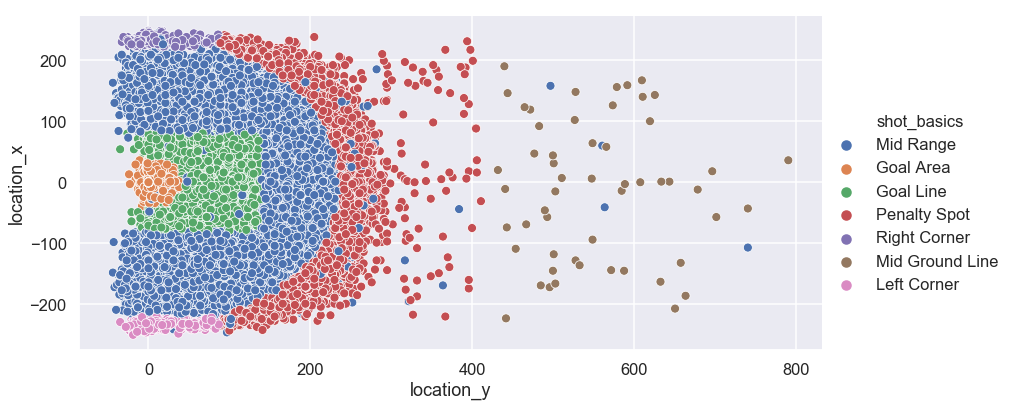

In [36]:
sns.set()
sns.set_context("talk")
sns.relplot(x='location_y',y='location_x',hue='shot_basics',data = df,height=6,aspect=2)#palette={0: "r", 1: "g"})

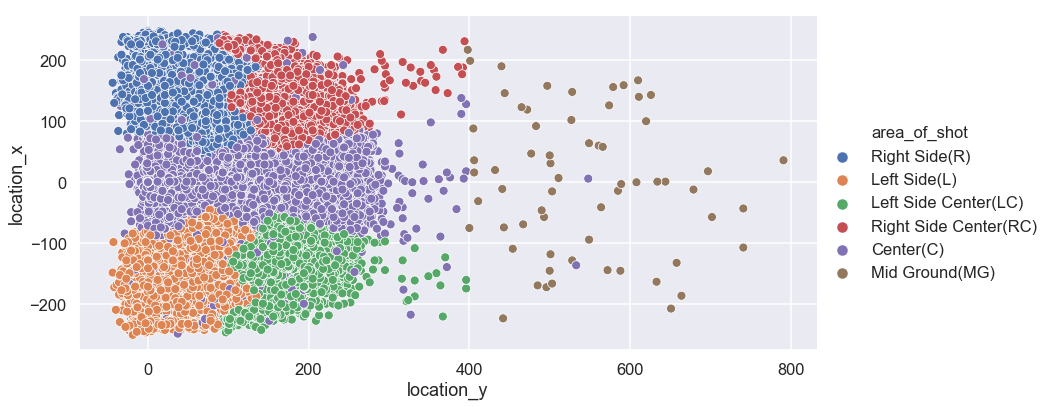

In [37]:
sns.set()
sns.set_context("talk")
sns.relplot(x='location_y',y='location_x',hue='area_of_shot',data = df,height=6,aspect=2)#palette={0: "r", 1: "g"})

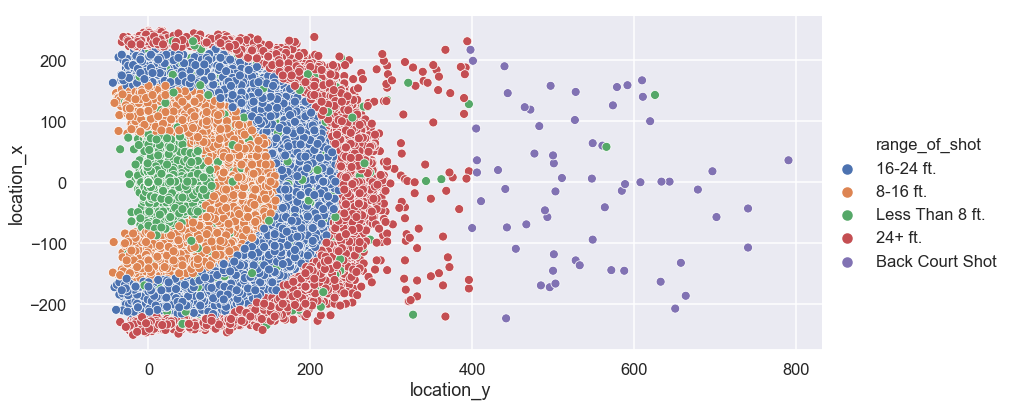

In [38]:
sns.set()
sns.set_context("talk")
sns.relplot(x='location_y',y='location_x',hue='range_of_shot',data = df,height=6,aspect=2)#palette={0: "r", 1: "g"})

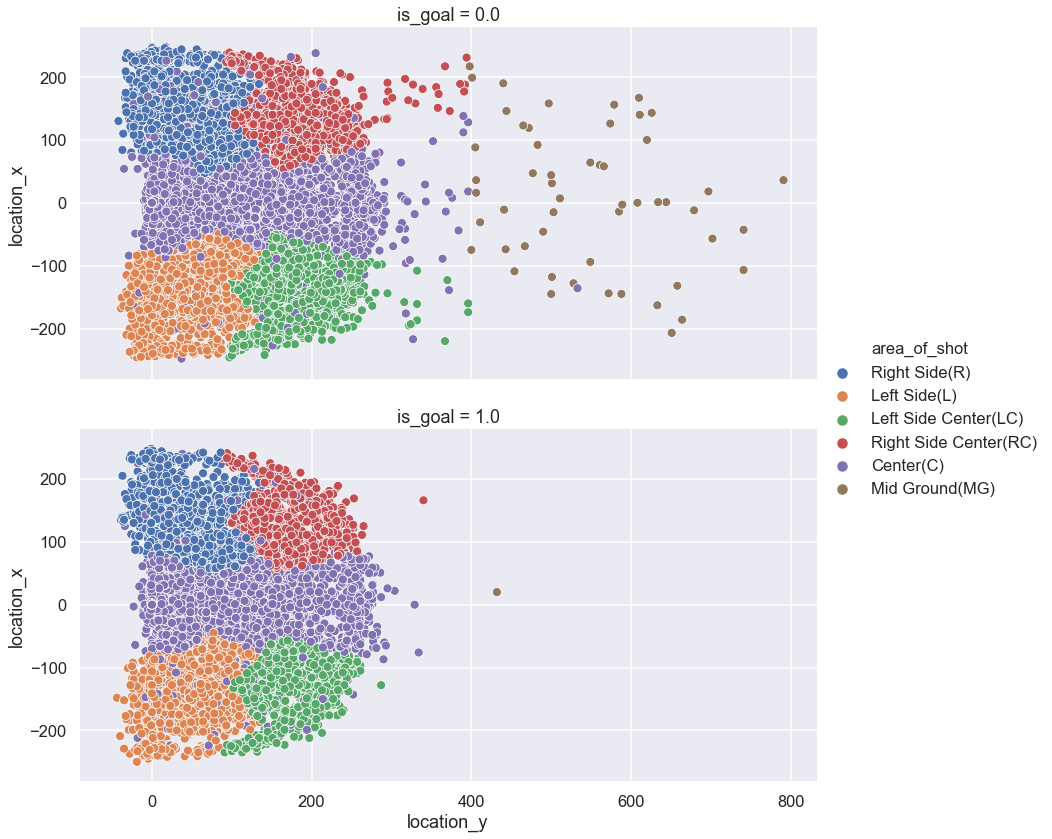

In [39]:
sns.set()
sns.set_context("talk")
sns.relplot(x='location_y',y='location_x',hue='area_of_shot',row='is_goal',data = df,height=6,aspect=2)#palette={0: "r", 1: "g"})

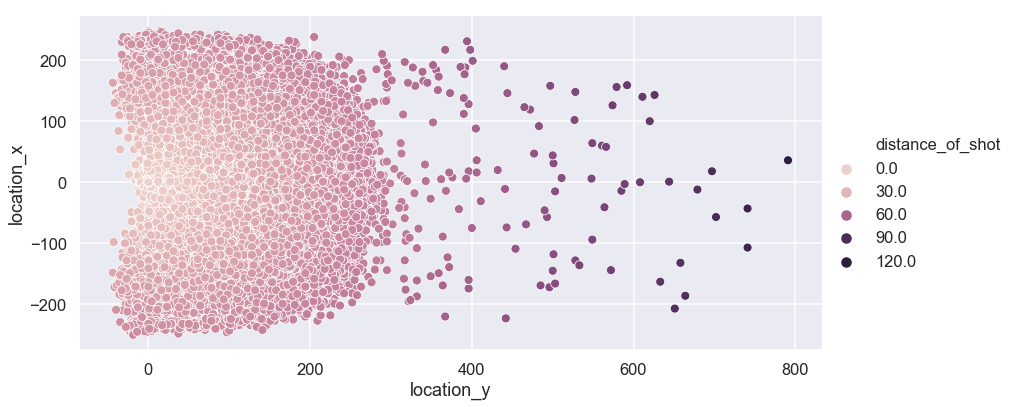

In [40]:
sns.set()
sns.set_context("talk")
sns.relplot(x='location_y',y='location_x',hue='distance_of_shot',data = df,height=6,aspect=2)#palette={0: "r", 1: "g"})

In [41]:
df.groupby('area_of_shot').mean()['is_goal']

area_of_shot
Center(C)                0.517915
Left Side Center(LC)     0.363576
Left Side(L)             0.392556
Mid Ground(MG)           0.014085
Right Side Center(RC)    0.382743
Right Side(R)            0.396975
Name: is_goal, dtype: float64

In [42]:
df.groupby('shot_basics').mean()['is_goal']

shot_basics
Goal Area          0.618073
Goal Line          0.453485
Left Corner        0.365741
Mid Ground Line    0.017544
Mid Range          0.408133
Penalty Spot       0.334040
Right Corner       0.334437
Name: is_goal, dtype: float64

In [43]:
df.groupby('range_of_shot').mean()['is_goal']

range_of_shot
16-24 ft.          0.400643
24+ ft.            0.331720
8-16 ft.           0.435185
Back Court Shot    0.014286
Less Than 8 ft.    0.553537
Name: is_goal, dtype: float64

# Processing Distance Of Shot

In [44]:
condition = ((df['distance_of_shot'].isna()) & (df['distance_of_shot.1']>99))
df['distance_of_shot.1'] = np.where(condition,np.nan,df['distance_of_shot.1'])

In [45]:
df['distance_of_shot'].isna().sum()

1567

In [46]:
df['distance_of_shot'].fillna((df['distance_of_shot.1']), inplace=True)

In [47]:
dos = df.groupby('range_of_shot').median()['distance_of_shot'].reset_index()[['range_of_shot','distance_of_shot']]

In [48]:
def fill_dos(row):
    condition = (dos['range_of_shot'] == row['range_of_shot'])
    return dos[condition]['distance_of_shot'].values[0]

In [49]:
df['distance_of_shot'] = df.apply(lambda row: fill_dos(row) if np.isnan(row['distance_of_shot']) else row['distance_of_shot'], axis=1)

# Processing Power Of Shot

In [50]:
condition = ((df['power_of_shot'].isna()) & (df['power_of_shot.1']>7))
df['power_of_shot.1'] = np.where(condition,np.nan,df['power_of_shot.1'])

In [51]:
df['power_of_shot'].isna().sum()

1486

In [52]:
df['power_of_shot.1'].describe()

count    28871.000000
mean        15.502402
std         29.271320
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max        118.360000
Name: power_of_shot.1, dtype: float64

In [53]:
df['power_of_shot'].fillna((df['power_of_shot.1']), inplace=True)

In [54]:
pos = df.groupby(['type_of_shot','range_of_shot','shot_basics']).median()['power_of_shot'].reset_index()[['type_of_shot','range_of_shot','shot_basics','power_of_shot']]
def fill_pos(row):
    condition = ((pos['type_of_shot'] == row['type_of_shot'])&
                 (pos['range_of_shot'] == row['range_of_shot'])&
                 (pos['shot_basics'] == row['shot_basics']))
    return pos[condition]['power_of_shot'].values[0]

In [55]:
df['power_of_shot'] = df.apply(lambda row: fill_pos(row) if np.isnan(row['power_of_shot']) else row['power_of_shot'], axis=1)

In [56]:
df['power_of_shot'].fillna(3,inplace=True)

# Processing KnockOut Match

In [57]:
condition = ((df['knockout_match'].isna()) & (df['knockout_match.1']>1))
df['knockout_match.1'] = np.where(condition,np.nan,df['knockout_match.1'])

In [58]:
df['knockout_match'].isna().sum()

1517

In [59]:
df['knockout_match'].fillna(df['knockout_match.1'], inplace = True)

In [60]:
df['knockout_match'].fillna(df['knockout_match'].mode()[0],inplace=True)

In [61]:
df['knockout_match'].mode()

0    0.0
dtype: float64

# Processing Locations

In [62]:
locx = df.groupby(['area_of_shot','shot_basics']).median()['location_x'].reset_index()[['area_of_shot','shot_basics','location_x']]
locy = df.groupby(['range_of_shot','distance_of_shot']).median()['location_y'].reset_index()[['range_of_shot','distance_of_shot','location_y']]

In [63]:
def fill_locx(row):
    condition = (
        (locx['area_of_shot'] == row['area_of_shot']) & 
        (locx['shot_basics'] == row['shot_basics']))
    return locx[condition]['location_x'].values[0]
def fill_locy(row):
    condition = (
        (locy['range_of_shot'] == row['range_of_shot']) & 
        (locy['distance_of_shot'] == row['distance_of_shot']))
    return locy[condition]['location_y'].values[0]

In [64]:
df['location_x'] = df.apply(lambda row: fill_locx(row) if np.isnan(row['location_x']) else row['location_x'], axis=1)
df['location_y'] = df.apply(lambda row: fill_locy(row) if np.isnan(row['location_y']) else row['location_y'], axis=1)

In [65]:
df['location_y'].fillna(74,inplace=True)

In [66]:
df.isna().sum()

match_event_id           0
location_x               0
location_y               0
remaining_min            0
power_of_shot            0
knockout_match           0
game_season              0
remaining_sec            0
distance_of_shot         0
is_goal               6268
area_of_shot             0
shot_basics              0
range_of_shot            0
date_of_game          1550
home/away                0
shot_id_number        1563
lat/lng                  0
type_of_shot             0
match_id                 0
remaining_min.1       1837
power_of_shot.1       1826
knockout_match.1      1794
remaining_sec.1       1792
distance_of_shot.1    1592
lat                      0
lng                      0
dtype: int64

# Getting Ready For Model

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_absolute_error

In [68]:
df.columns

Index(['match_event_id', 'location_x', 'location_y', 'remaining_min',
       'power_of_shot', 'knockout_match', 'game_season', 'remaining_sec',
       'distance_of_shot', 'is_goal', 'area_of_shot', 'shot_basics',
       'range_of_shot', 'date_of_game', 'home/away', 'shot_id_number',
       'lat/lng', 'type_of_shot', 'match_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1', 'lat', 'lng'],
      dtype='object')

In [69]:
df.drop([ 'date_of_game',
       'lat/lng', 'match_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],axis=1,inplace=True)

In [70]:
ros_enc = LabelEncoder()
sb_enc = LabelEncoder()
aos_enc = LabelEncoder()
tos_enc = LabelEncoder()
ha_enc = LabelEncoder()
lat_enc = LabelEncoder()
lng_enc = LabelEncoder()

In [71]:
df['range_of_shot'] = ros_enc.fit_transform(df['range_of_shot'].astype('str')).astype('object')
df['shot_basics'] = sb_enc.fit_transform(df['shot_basics'].astype('str')).astype('object')
df['area_of_shot'] = aos_enc.fit_transform(df['area_of_shot'].astype('str')).astype('object')
df['type_of_shot'] = tos_enc.fit_transform(df['type_of_shot'].astype('str')).astype('object')
df['home/away'] = ha_enc.fit_transform(df['home/away'].astype('str')).astype('object')
df['lat'] = lat_enc.fit_transform(df['lat'].astype('str')).astype('object')
df['lng'] = tos_enc.fit_transform(df['lng'].astype('str')).astype('object')

In [72]:
d = pd.DataFrame(i for i in range(1,30698))
d.columns = ['shot_id_number'] 
df.drop('shot_id_number',axis=1,inplace=True)
df1 = pd.concat([df,d],axis=1)

In [73]:
train = df1[df1['is_goal'].notnull()]
test = df1[df1['is_goal'].isnull()]

In [74]:
samsub = pd.read_csv('sample_submission.csv')

In [75]:
testt = test[test['shot_id_number'].isin(samsub['shot_id_number'])]

In [76]:
train = train.rename(columns={"home/away": "away", "game_season": "age","match_event_id":"no_of_shots"})
testt = testt.rename(columns={"home/away": "away", "game_season": "age","match_event_id":"no_of_shots"})

In [77]:
testt.to_csv('testt.csv')

In [78]:
targets = train.is_goal
train.drop(['is_goal','shot_id_number'],axis=1,inplace=True)
testt.drop(['is_goal','shot_id_number'],axis=1,inplace=True)

In [79]:
train.isna().sum()

no_of_shots         0
location_x          0
location_y          0
remaining_min       0
power_of_shot       0
knockout_match      0
age                 0
remaining_sec       0
distance_of_shot    0
area_of_shot        0
shot_basics         0
range_of_shot       0
away                0
type_of_shot        0
lat                 0
lng                 0
dtype: int64

In [80]:
train.head()

,no_of_shots,location_x,location_y,remaining_min,power_of_shot,knockout_match,age,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,away,type_of_shot,lat,lng
1,11,-157.0,0.0,10.0,1.0,0.0,15.0,622.0,35.0,2,4,2,0,40,34,34
2,11,-101.0,135.0,7.0,1.0,0.0,15.0,465.0,36.0,1,4,0,0,18,34,34
3,11,138.0,175.0,6.0,1.0,0.0,15.0,412.0,42.0,4,4,0,0,23,34,34
4,11,0.0,0.0,5.0,2.0,0.0,15.0,319.0,20.0,0,0,4,0,1,34,34
5,11,-145.0,-11.0,9.0,3.0,0.0,20.0,572.0,34.0,2,4,2,0,9,34,34


In [81]:
X_train, X_test, y_train, y_test = train_test_split(train,targets, test_size=0.20, random_state=42)

In [82]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [83]:
network = models.Sequential()

In [84]:
network.add(layers.Dense(units=16,activation='relu',input_shape=(len(train.columns),)))

Instructions for updating:
Colocations handled automatically by placer.


In [85]:
network.add(layers.Dense(units=16,activation='relu'))

In [86]:
network.add(layers.Dense(units=16,activation='relu'))
network.add(layers.Dense(units=1,activation='sigmoid'))

In [87]:
network.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [88]:
history = network.fit(train,targets,epochs=10,verbose=0,batch_size=1000)

Instructions for updating:
Use tf.cast instead.


In [619]:
1.0/(1.0+mean_absolute_error(y_test,network.predict(X_test)))

0.675498651107285

In [620]:
aux = pd.read_csv('testt.csv')
sub = pd.DataFrame(index=aux['shot_id_number'], columns=['is_goal'])

In [621]:
sub['is_goal'] = network.predict(testt)

In [622]:
sub.head()

,is_goal
shot_id_number,
1,0.359518
8,0.489205
17,0.507134
20,0.651099
33,0.368311


In [623]:
sub.to_csv('nnfinal.csv')